# Hands-on Activity 3.3 - CNN Network Architectures

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands-on Activity 3.3 CNN Network Architectures**
**Name** | Mendoza, Paulo
<hr> | <hr>
**Section** | CPE32S8
**Date Performed**: | March 5, 2024
**Date Submitted**: | March 11, 2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
!pip install pillow
!pip install scipy

In [10]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [ ]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
img_path = "/content/drive/MyDrive/data sci 3 files/mounted files/DogReal.png"

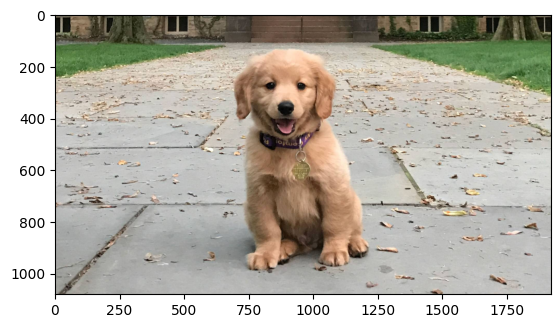

In [26]:
plt.imshow(Image.open(img_path))

Use VGG-16 pre-trained model

In [27]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [28]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [29]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 768ms/step


,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.891949
1,n02088094,Afghan_hound,0.048299
2,n02091831,Saluki,0.019097
3,n02088466,bloodhound,0.009874
4,n02099712,Labrador_retriever,0.008989
5,n02113799,standard_poodle,0.007550
6,n02090379,redbone,0.003058
7,n02108551,Tibetan_mastiff,0.001916
8,n02104029,kuvasz,0.001850
9,n02091635,otterhound,0.001312


Interpret the result of prediction using VGG16 model

I have downloaded an image of a dog and the model is 80% certain that it is a golden retriever which I search on the internet for me it is also a golden retriever. So the models result is correct while the next guess have a very low probability and all the other subsequent classes as well. Which means it is very certain it is golden retriever and others doesn't even come close.

Use Resnet50 pretrained model

In [30]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

Predict the result

In [31]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.986425
1,n02099712,Labrador_retriever,0.004944
2,n02104029,kuvasz,0.003983
3,n02088094,Afghan_hound,0.002316
4,n02113799,standard_poodle,0.000737
5,n02091831,Saluki,0.000394
6,n02088466,bloodhound,0.000302
7,n02102318,cocker_spaniel,0.000215
8,n02090721,Irish_wolfhound,0.000114
9,n02111500,Great_Pyrenees,0.000084


Interpret the result using RESNET50 pretrained model

Again a very high probability of the 1st guess of 98% and very low for the other classes available.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [39]:
from keras.applications import mobilenet

mobilenet_model = mobilenet.MobileNet(weights='imagenet')
mobilenet_model.summary()

predict_image(mobilenet_model, img_path, mobilenet.preprocess_input, mobilenet.decode_predictions)

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

1/1 [==============================] - 1s 864ms/step


,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.998532
1,n02108551,Tibetan_mastiff,0.000475
2,n02099712,Labrador_retriever,0.000330
3,n02112137,chow,0.000178
4,n02111277,Newfoundland,0.000087
5,n02090379,redbone,0.000076
6,n02102318,cocker_spaniel,0.000066
7,n02087394,Rhodesian_ridgeback,0.000049
8,n02113023,Pembroke,0.000026
9,n02088094,Afghan_hound,0.000023


In [41]:
from keras.applications import mobilenet_v2

mobilenet_v2_model = mobilenet_v2.MobileNetV2(weights='imagenet')
mobilenet_v2_model.summary()

predict_image(mobilenet_v2_model, img_path, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions)

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.972280
1,n02099712,Labrador_retriever,0.010659
2,n02102318,cocker_spaniel,0.000658
3,n02099849,Chesapeake_Bay_retriever,0.000620
4,n02099267,flat-coated_retriever,0.000520
5,n02104029,kuvasz,0.000432
6,n02091831,Saluki,0.000405
7,n02108551,Tibetan_mastiff,0.000334
8,n02101556,clumber,0.000298
9,n02102480,Sussex_spaniel,0.000296


In [44]:
from keras.applications import densenet

densenet_model = densenet.DenseNet121(weights='imagenet')
densenet_model.summary()

predict_image(densenet_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_11[0][0]']            
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.867933
1,n02099712,Labrador_retriever,0.113135
2,n02102318,cocker_spaniel,0.004220
3,n02104029,kuvasz,0.002150
4,n02111500,Great_Pyrenees,0.001624
5,n02088364,beagle,0.001466
6,n02108551,Tibetan_mastiff,0.001074
7,n02090379,redbone,0.000641
8,n04409515,tennis_ball,0.000523
9,n02111277,Newfoundland,0.000441


In [47]:
# inception should resize the image to 299 x 299
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

from keras.applications import inception_v3

inception_v3_model = inception_v3.InceptionV3(weights='imagenet')
inception_v3_model.summary()

predict_image(inception_v3_model, img_path, inception_v3.preprocess_input, inception_v3.decode_predictions)

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 149, 149, 32)         864       ['input_14[0][0]']            
                                                                                                  
 batch_normalization_188 (B  (None, 149, 149, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

,Predicted Class,Name,Probability
0,n02099601,golden_retriever,0.953524
1,n02099712,Labrador_retriever,0.011910
2,n04409515,tennis_ball,0.002176
3,n03223299,doormat,0.001931
4,n02102318,cocker_spaniel,0.001321
5,n02104029,kuvasz,0.000538
6,n02108551,Tibetan_mastiff,0.000527
7,n03982430,pool_table,0.000346
8,n02099849,Chesapeake_Bay_retriever,0.000344
9,n02100877,Irish_setter,0.000341


MobileNet   99 %

MobileNetV2 97 %

DenseNet121 86 %

InceptionV3 95 %

MobileNet performes the best. While DenseNet121 performed the worst in the sample image that I have choosen. So even if mobilenetv2 is the next version of mobilenet it didnt performe better than mobilenet. While even if the DenseNet121 and InceptionV3 have a lot of parameters it still didn't performed better.


#### Conclusion

Having this pre maid model with this own weights is helpful. They are already optimized by proffesionals and is considered a standard. We would not have to train this from scratch to find the layer combination and weights. Which these models are very huge and resource heavy to make from scratch. We can just use them readily and apply transfer learning to use specilized their purpose.

# Google Collab Link:

https://colab.research.google.com/drive/1maiaB4UVBbFdTxd4DWYsc45GQKTwcDsn?usp=sharing